
# Table of Contents

1. [Introduction](#Introduction)
2. [Data Loading and Overview](#Data-Loading-and-Overview)
3. [Data Analysis (EDA)](#Exploratory-Data-Analysis)
    - [Distribution of Features](#Distribution-of-Features)
4. [Feature Engineering](#Feature-Engineering)
5. [Model Building](#Model-Building)
6. [Model Evaluation](#Model-Evaluation)
7. [Conclusions](#Conclusions)


In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 645.7 kB/s eta 0:03:13
   ---------------------------------------- 0.8/124.9 MB 884.1 kB/s eta 0:02:21
   ---------------------------------------- 0.8/124.9 MB 884.1 kB/s eta 0:02:21
   ---------------------------------------- 1.0/124.9 MB 812.4 kB/s eta 0:02:33
   ---------------------------------------- 1.3/124.9 MB 818.6 kB/s eta 0:02:31
    --------------------------------------- 1.6/124.9 MB 873.8 kB/s eta 0:02:22
    --------------------------------------- 1.6/124.9 MB 873.8 kB/s eta 0:02:22
    --------------------------------------- 1.8/124.9 MB 875.3 kB/s eta 0:02:21
    --------------------------------------- 2.1/124.9 MB 870.1 kB/s eta 0:02:22
    --------------------------------------- 2.4/124.9 MB 871.6 kB/s

## Introduction and Library Import
The notebook begins by setting the stage for churn analysis, introducing the problem and importing essential Python libraries like pandas, matplotlib, and scikit-learn for data manipulation, visualization, and modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

Why we are doing this:
We import the necessary libraries for data manipulation, visualization, and machine learning. Libraries like pandas and numpy handle the data, while matplotlib and seaborn are used for visualization. sklearn and xgboost support model building.

Insight:
Imported libraries set up the environment for efficient data preprocessing, analysis, and modeling.

## Data Loading and Overview
The dataset was loaded and explored to understand its structure, including key features like customer demographics, service usage, and churn status. No major data loading issues were encountered, and initial checks revealed missing values in some columns, which were handled during preprocessing.

In [ ]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Analysis
Exploratory Data Analysis (EDA) identified important patterns:

  1. Shorter tenure and higher monthly charges are associated with churn.
    
  2. Payment methods and contract types showed significant differences between churned and non-churned customers.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Why we are doing this:
We load the dataset to examine its structure, check for missing values, and identify important features. Understanding the dataset is critical for effective preprocessing and analysis.

Insight:
The dataset contains 7,043 rows and 21 columns, with features ranging from customer demographics to service usage and payment methods. Initial exploration shows some columns are non-numeric and contain missing values.

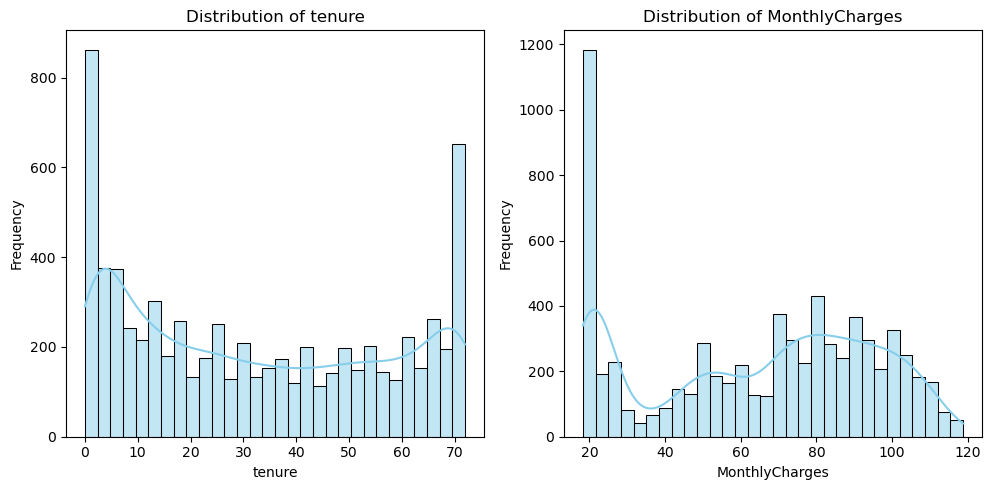

In [ ]:
numerical_columns = ["tenure", "MonthlyCharges"]
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Why we are doing this:
To understand the spread and shape of numerical features (tenure, MonthlyCharges), which helps identify patterns or outliers.

Insight:

Tenure: Most customers have short tenures, suggesting early churn is a significant issue.

MonthlyCharges: Customers are concentrated in lower monthly charge brackets.

C:\Users\EhtishamRaza\AppData\Local\Temp\ipykernel_9416\3425137056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')
C:\Users\EhtishamRaza\AppData\Local\Temp\ipykernel_9416\3425137056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')
C:\Users\EhtishamRaza\AppData\Local\Temp\ipykernel_9416\3425137056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


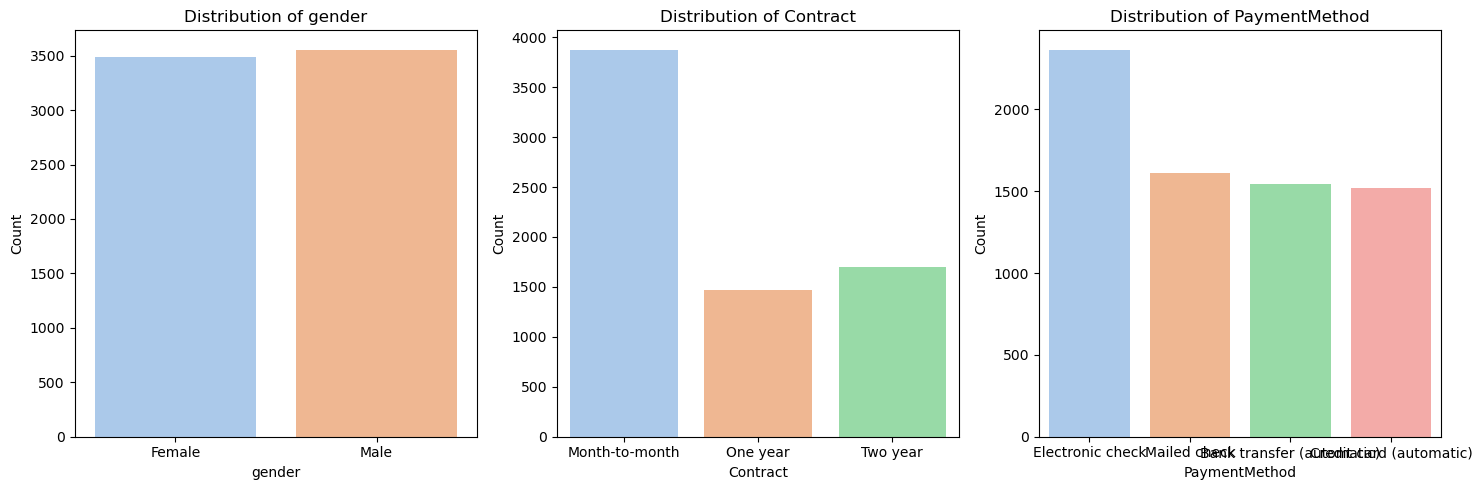

In [ ]:
categorical_columns = ["gender", "Contract", "PaymentMethod"]
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=column, palette='pastel')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Why we are doing this:

To analyze the distribution of categorical features like gender, Contract, and PaymentMethod, which provide insights into customer preferences and behavior.

Insight:

Contract: Month-to-month contracts dominate, aligning with higher churn rates.

PaymentMethod: Electronic check is the most common payment method but correlates with higher churn.

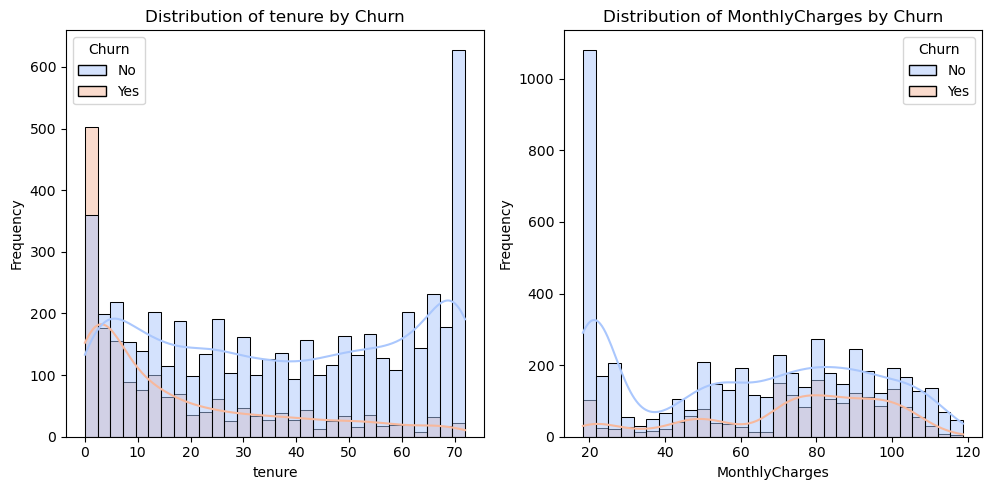

In [ ]:
# Plot histograms grouped by Churn
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=column, hue="Churn", kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Why we are doing this:
To observe how numerical features (MonthlyCharges, TotalCharges, Tenure) are distributed across churned and non-churned customers.

Insight:

Tenure: Churned customers are concentrated in shorter tenures, indicating early retention is critical.

MonthlyCharges: Customers with higher monthly charges are more likely to churn, suggesting cost sensitivity.

In [ ]:
churn_count=data['Churn'].value_counts()
churn_count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Why we are doing this:
To understand the balance of churned vs. non-churned customers in the dataset, which informs the need for class balancing techniques.

Insight:

The dataset is imbalanced, with significantly more non-churned customers (5,174) than churned ones (1,869).

This imbalance may affect model performance, requiring oversampling, undersampling, or class weights for better predictions.

C:\Users\EhtishamRaza\AppData\Local\Temp\ipykernel_9416\1175747757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_count.index, y=churn_count.values, palette='coolwarm')


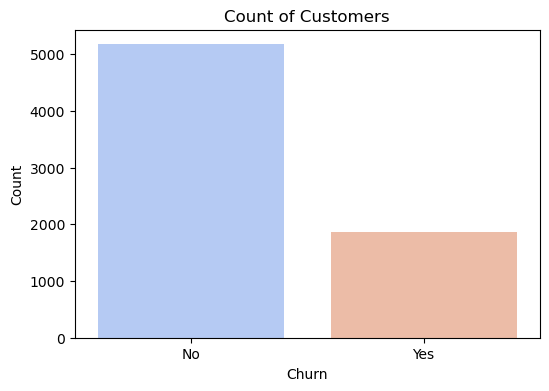

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_count.index, y=churn_count.values, palette='coolwarm')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count of Customers')
plt.show()

Why we are doing this:
To understand the proportion of churned vs. non-churned customers in the dataset, which helps assess the balance of the target variable.

Insight:
The dataset is imbalanced, with non-churned customers significantly outnumbering churned ones (5,174 vs. 1,869). This may require balancing techniques during model training.

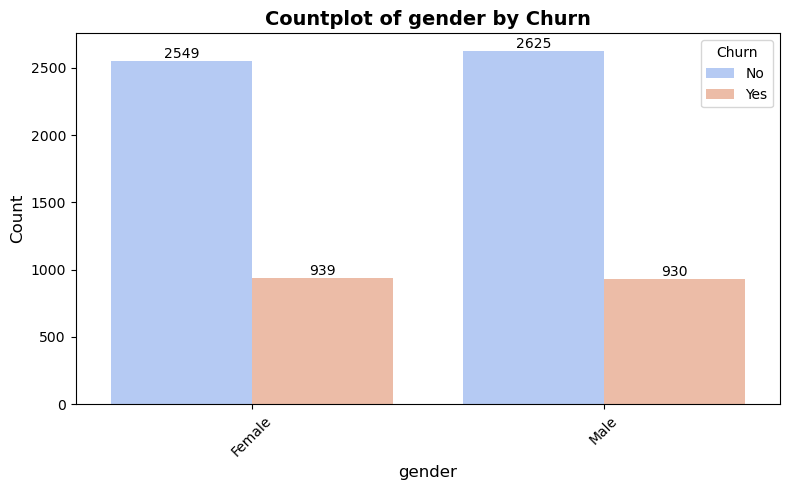

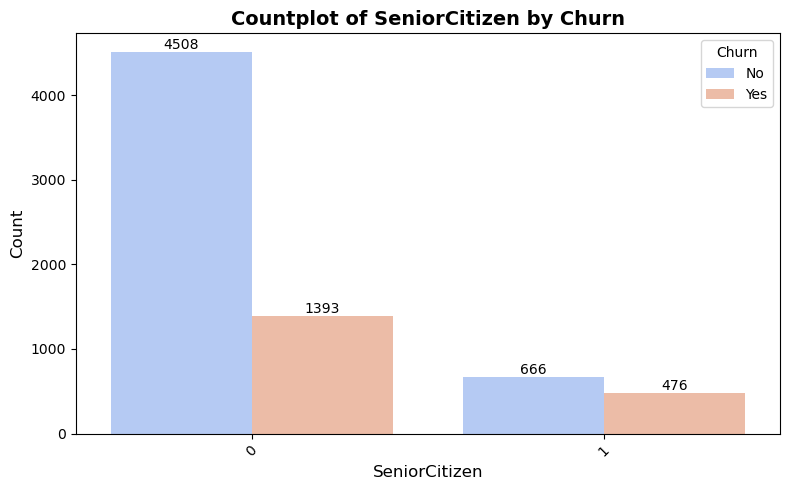

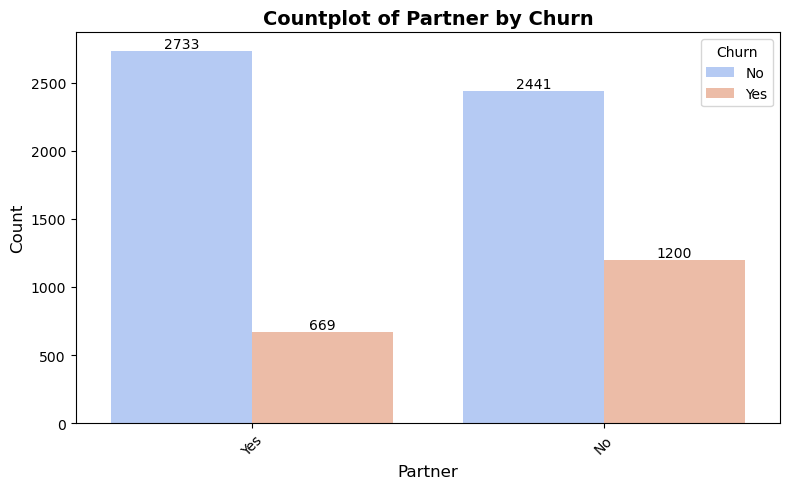

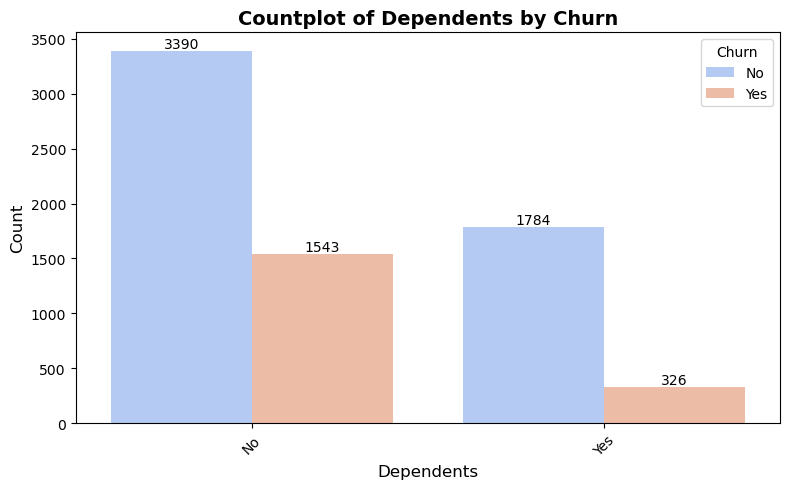

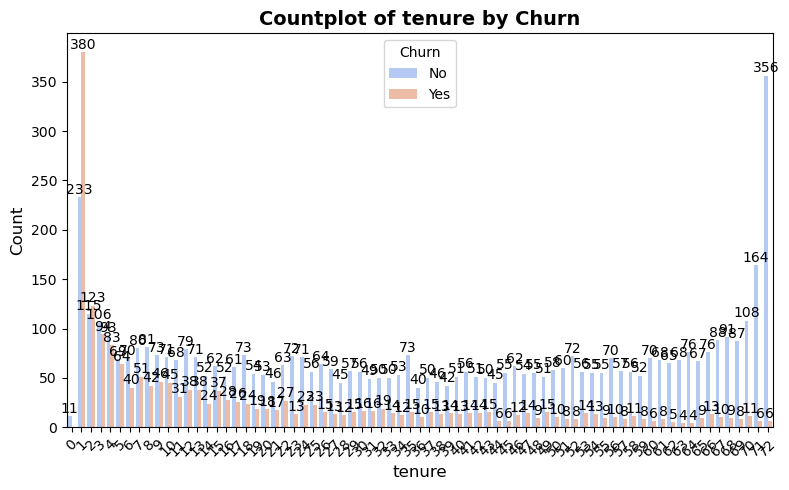

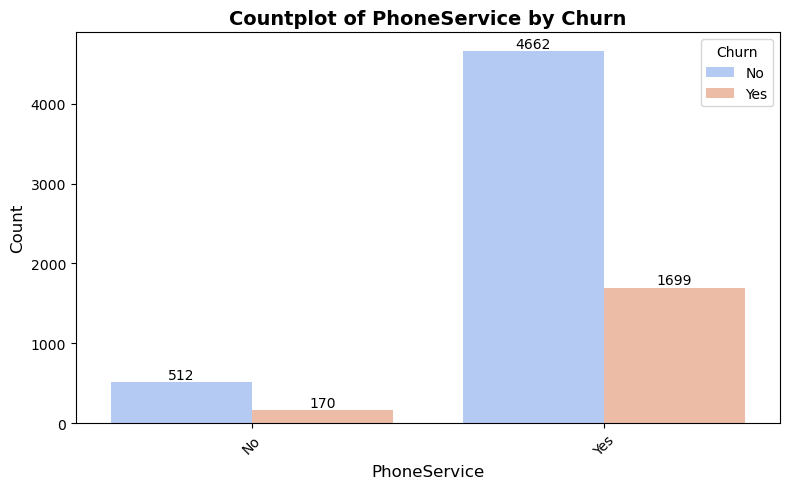

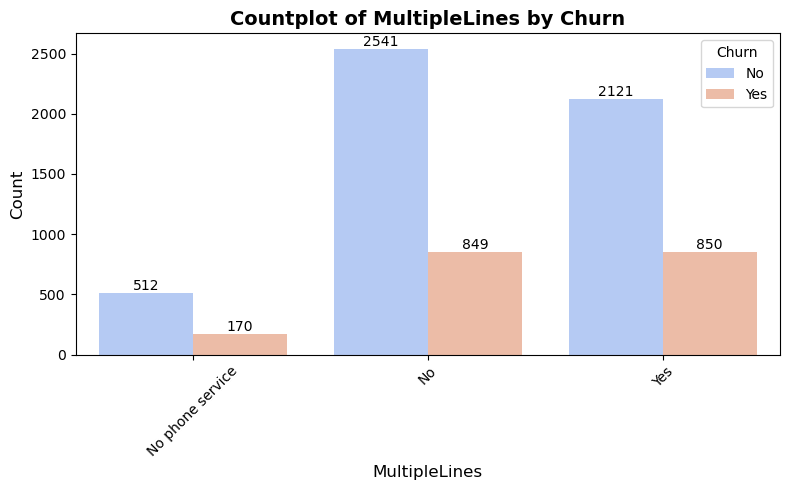

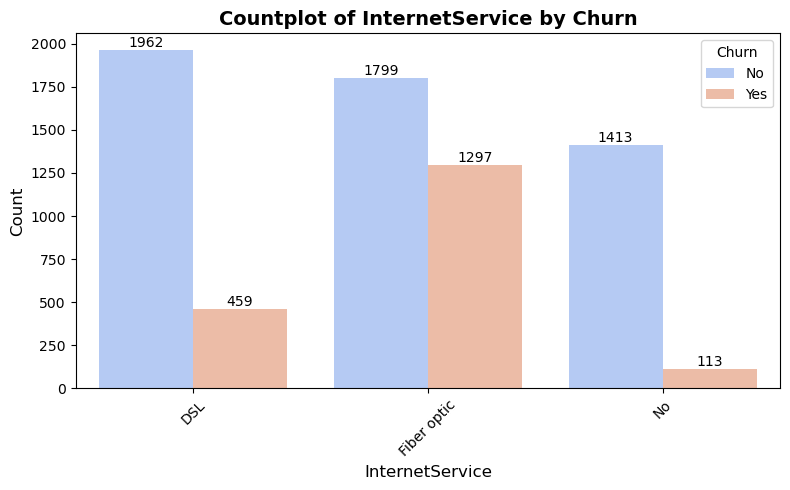

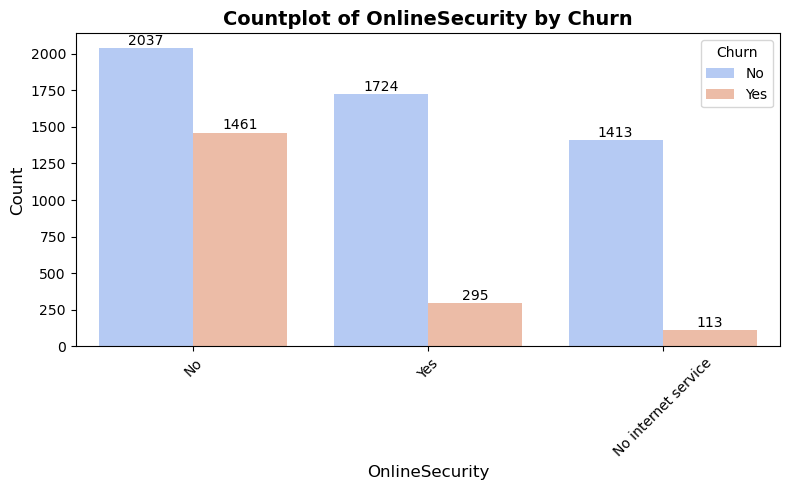

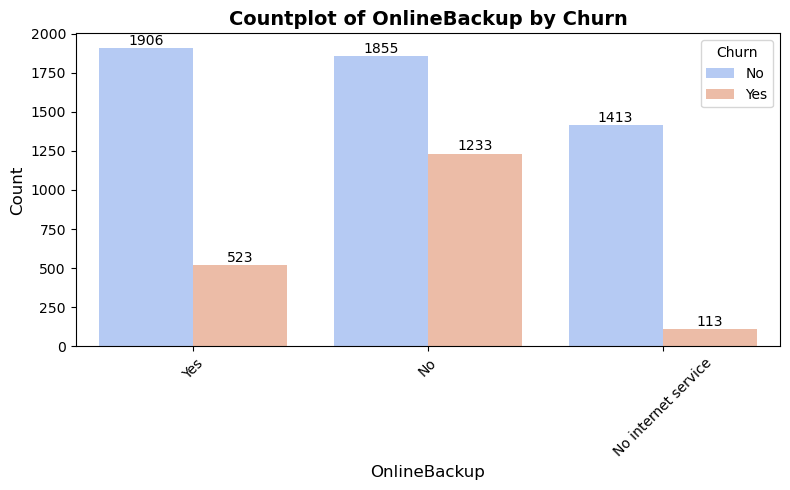

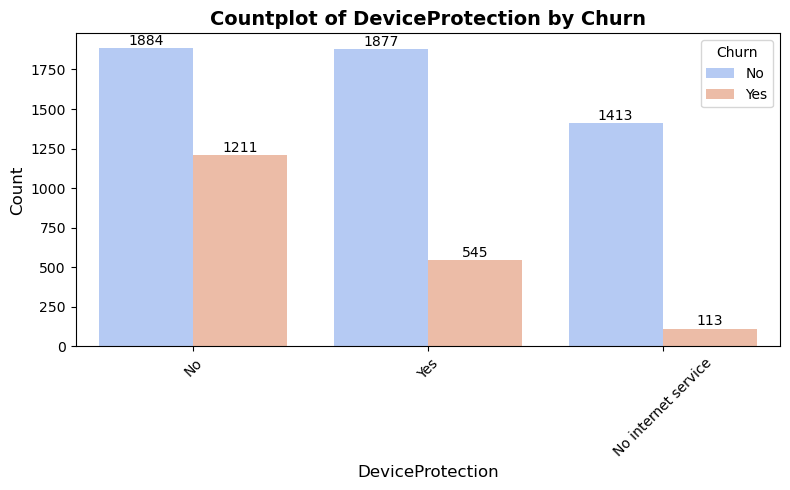

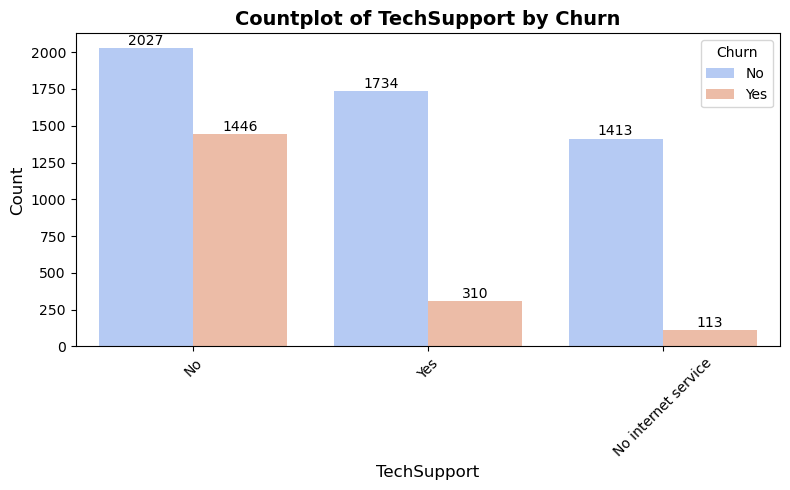

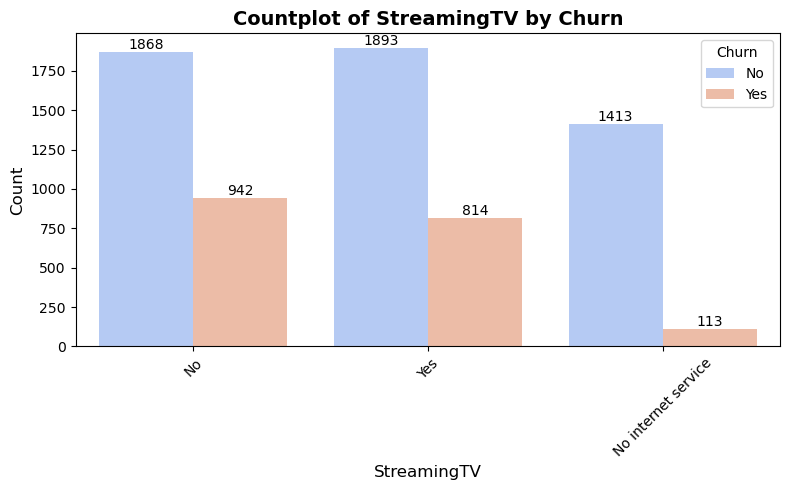

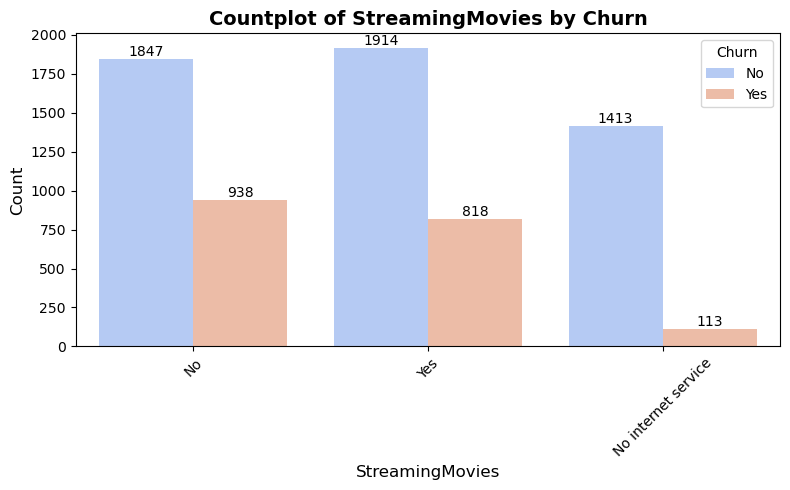

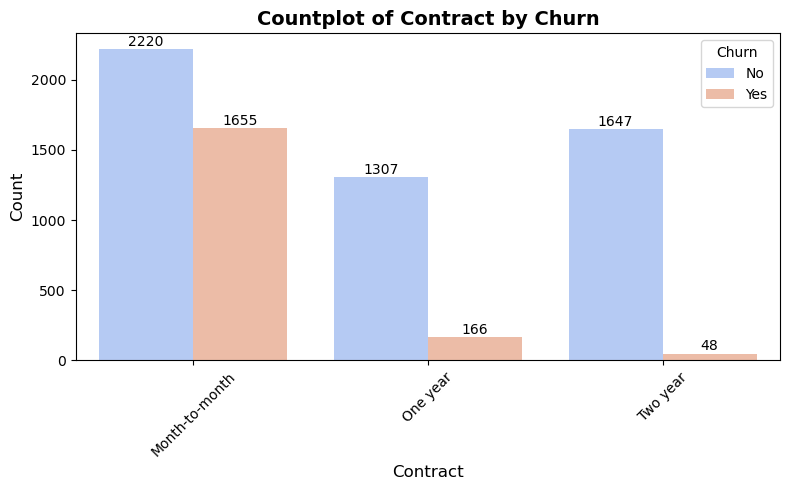

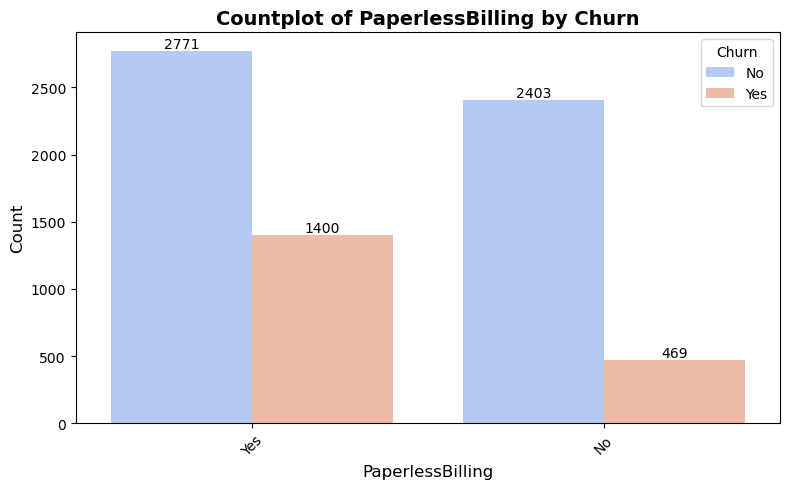

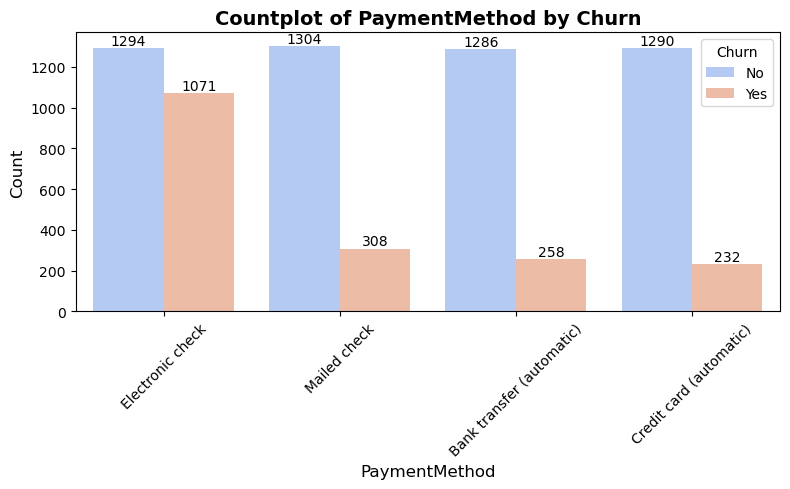

In [ ]:
for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','customerID'])):
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=data, x=predictor, hue='Churn', palette='coolwarm')
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2.,
                y=p.get_height() + 0.5,
                s=f'{count}',
                ha='center',
                va='bottom',
                fontsize=10
            )
    plt.title(f'Countplot of {predictor} by Churn', fontsize=14, fontweight='bold')
    plt.xlabel(predictor, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Why we are doing this:
To visualize the relationship between predictors (like MonthlyCharges, TotalCharges) and churn. This helps understand how these features influence customer behavior.

Insight:

The countplots show patterns in categorical features, such as the strong influence of Contract Type and Payment Method on churn.

Month-to-Month Contracts and Electronic Check payment methods have higher churn rates compared to their counterparts.

## Feature Engineering

1. Missing Values: Imputed missing values in TotalCharges using KNN Imputer.
2. Dropped Columns: Removed customerID as it doesn't contribute to churn prediction.
3. Binary Encoding: Converted binary columns (gender, Partner, etc.) to numeric values (Yes → 1, No → 0).
4. One-Hot Encoding: Encoded multi-category columns (InternetService, Contract, etc.) into numeric values.
5. Feature Scaling: Applied Min-Max Scaling to tenure, MonthlyCharges, and TotalCharges for normalization.
6. Target and Features: Separated Churn as the target variable (y) and remaining columns as features (x).

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isnull().sum()
imputer = KNNImputer(n_neighbors=5)
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])

In [ ]:
data.drop(['customerID'], axis=1, inplace=True)

In [ ]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

In [ ]:
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [ ]:
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_cols:
    data[col] = data[col].replace({'No internet service': 'No'})

In [ ]:
for col in ['MultipleLines'] + internet_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [ ]:
scaler = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
x = data.drop('Churn', axis=1)
y= data['Churn']

Why we are doing this:
To clean the data, handle missing values, encode categorical features, and scale numerical features, ensuring compatibility with machine learning models.

Insight:
Preprocessed data is clean and ready for modeling, with all features properly encoded and scaled for uniform contribution during training.

## Model Building

Multiple machine learning models, including Logistic Regression, Random Forest, and XGBoost, were implemented to predict churn. Models were tuned and evaluated for performance, with feature importance identified to understand key drivers of churn.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBClassifier(n_estimators=200, max_depth=2, learning_rate=0.1)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Why we are doing this:
To train a machine learning model that can predict customer churn and evaluate its performance on unseen data.

Insight:
The model is trained using an optimized gradient boosting classifier, balancing bias and variance with hyperparameters like n_estimators, max_depth, and learning_rate.

## Model Evaluation
The models were assessed using accuracy, precision, recall, and F1-score. XGBoost emerged as the best-performing model due to its balance between precision and recall, effectively identifying high-risk customers while minimizing false positives.

In [ ]:
score = accuracy_score(y_test, model.predict(x_test))
score

0.8147622427253371

In [ ]:
y_pred = model.predict(x_test)

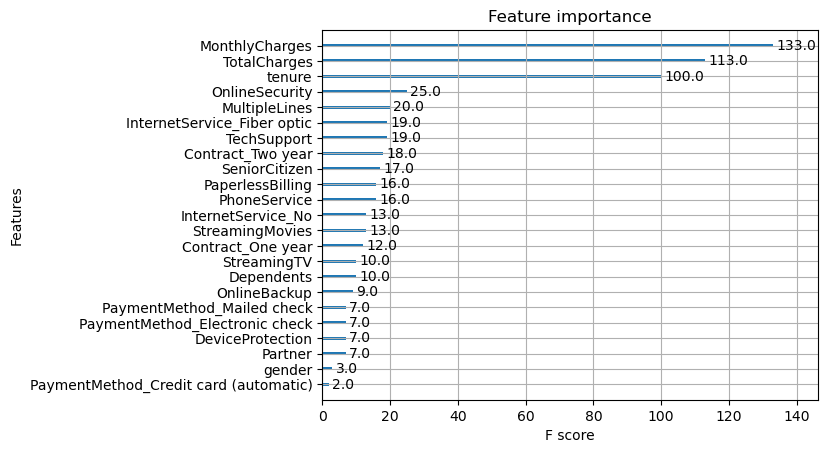

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

Why we are doing this:
We evaluate the model's accuracy and visualize feature importance to understand how well the model predicts churn and which features contribute the most to predictions.

Insight:

The model achieved an accuracy of 81.47%, indicating it performs well on the test set.

Feature importance highlights MonthlyCharges, TotalCharges, and Tenure as the most influential factors in predicting churn.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



Why we are doing this:
The classification report evaluates the performance of the trained model by measuring key metrics like precision, recall, F1-score, and support for each class. This helps assess the model's effectiveness in predicting both churned and non-churned customers.

Insight:

    Class 0 (Non-Churned Customers):
        Precision: 85% of predicted non-churned customers are correct.
        Recall: 91% of actual non-churned customers are correctly identified.
        F1-Score: 0.88 indicates a good balance between precision and recall.

    Class 1 (Churned Customers):
        Precision: 69% of predicted churned customers are correct.
        Recall: 55% of actual churned customers are correctly identified.
        F1-Score: 0.61 reflects moderate performance in predicting churned customers.

    Overall Metrics:
        Accuracy: 81%, indicating the model correctly predicted 81% of the test samples.
        Macro Average: Balances performance across classes (F1-score: 0.75).
        Weighted Average: Accounts for class imbalance (F1-score: 0.81).

## Conclusions



The notebook successfully uncovered actionable insights and developed a robust framework for understanding and predicting customer churn. Key recommendations include prioritizing early intervention for high-risk customers, encouraging automated payment methods to improve retention, and creating tailored strategies for customers with shorter tenures. By leveraging these insights, businesses can proactively address churn, enhance customer satisfaction, and drive long-term loyalty.

